# Compare Low-Level Video Features to External emotion ratings

In [9]:
import pandas as pd
import emocodes as ec
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(context='paper',style='white')

ll_dir = '/Users/catcamacho/Box/CCP/EmoCodes_project/reliability_data/episodes/'
ext_dir = '/Users/catcamacho/Box/CCP/EmoCodes_project/reliability_data/UGTV_data_summary/'

## AHKJ

In [10]:
# combine data into a single dataframe and convert to standard units
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

ll = pd.read_csv(ll_dir + 'AHKJ_lowlevel_features.csv', index_col='onset')[['brightness','frac_high_saliency','sharpness','vibrance','rms','dynamic_tempo']]
ext = pd.read_csv(ext_dir + 'AHKJ_ratings.csv', index_col=None)[['Positive','Negative']]
combdata = ext.merge(ll, left_index=True, right_index=True)
data = pd.DataFrame(mm.fit_transform(combdata), columns=combdata.columns, index=combdata.index)
data.columns
data.columns=['Positive', 'Negative', 'Brightness','Visual Saliency', 'Visual Sharpness', 'Visual Vibrance', 'Loudness', 'Tempo']

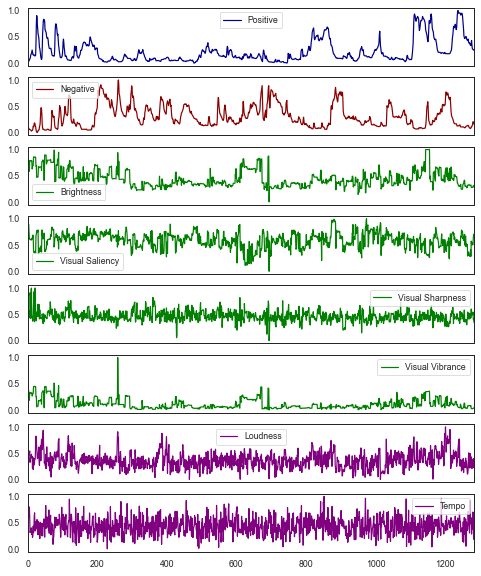

In [11]:
data.plot(subplots=True, figsize=(8,10),xlim=(0, data.index.to_list()[-1]), legend=True,
          color=['darkblue','darkred','green','green','green','green','purple','purple'])
plt.savefig('AHKJ_ll_plots.svg')

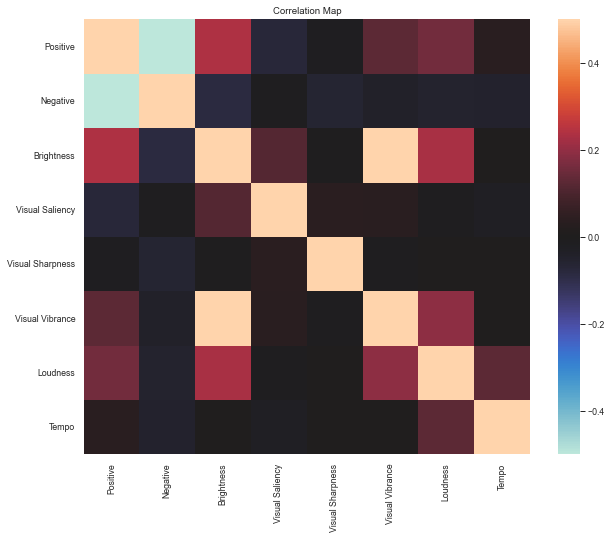

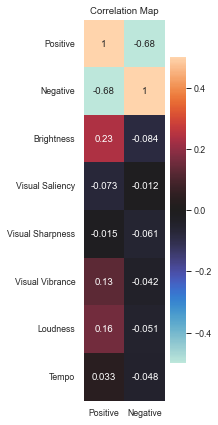

In [14]:
# Compute first derivative and compute correlations between shifts in values
corr = ec.pairwise_corr(data)

plt.figure(figsize=(10,8))
sns.heatmap(corr, center=0, vmin=-0.5, vmax=0.5)
plt.title("Correlation Map")
plt.show()
plt.close()

plt.figure(figsize=(3,6))
sns.heatmap(corr[['Positive','Negative']], annot=True, center=0, vmin=-0.5, vmax=0.5)
plt.title("Correlation Map")
plt.tight_layout()
plt.savefig('AHKJ_LL_correlation_map.svg')
plt.show()
plt.close()

In [5]:
vifs = ec.vif_collineary(data)
vifs

Positive            1.597595
Negative            1.482251
Brightness          6.344836
Visual Saliency     1.038575
Visual Sharpness    1.022665
Visual Vibrance     6.215573
Loudness            1.106026
Tempo               1.016556
Name: VIF, dtype: float64

## MLP

In [16]:
# combine data into a single dataframe
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

ll = pd.read_csv(ll_dir + 'MLP_lowlevel_features.csv', index_col='onset')[['brightness','frac_high_saliency','sharpness','vibrance','rms','dynamic_tempo']]
ext = pd.read_csv(ext_dir + 'MLP_ratings.csv', index_col=None)[['Positive','Negative']]
combdata = ext.merge(ll, left_index=True, right_index=True)
data = pd.DataFrame(mm.fit_transform(combdata), columns=combdata.columns, index=combdata.index)
data.head()

,Positive,Negative,brightness,frac_high_saliency,sharpness,vibrance,rms,dynamic_tempo
0,0.172397,0.318315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.089239,0.186420,0.000000,0.000000,0.000000,0.000000,0.000685,0.561503
2,0.007668,0.073697,0.157184,0.553902,0.321569,0.030031,0.156099,0.551068
3,0.000000,0.054237,0.540936,0.535270,1.000000,0.322976,0.580835,0.562273
4,0.000000,0.049067,0.549132,0.487233,1.000000,0.325167,0.520640,0.683024


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

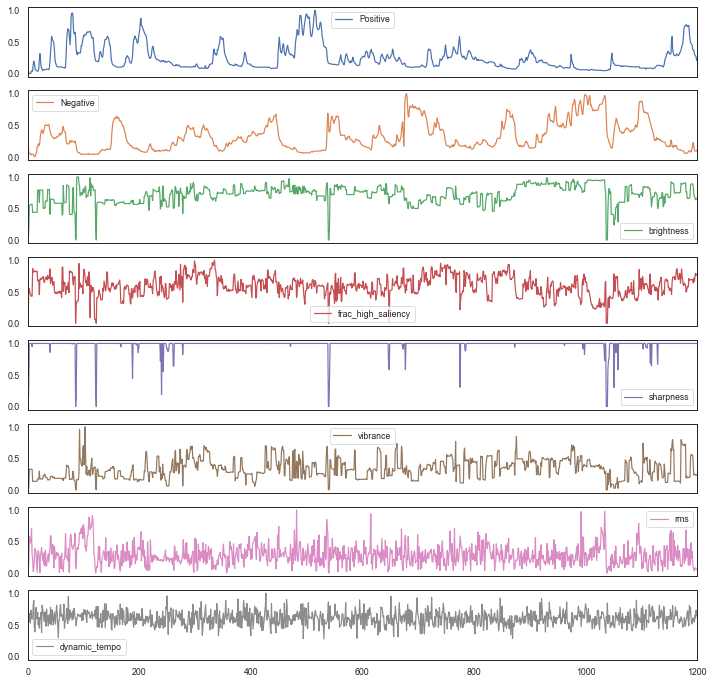

In [17]:
data.plot(subplots=True, figsize=(12,12),xlim=(0, data.index.to_list()[-1]))

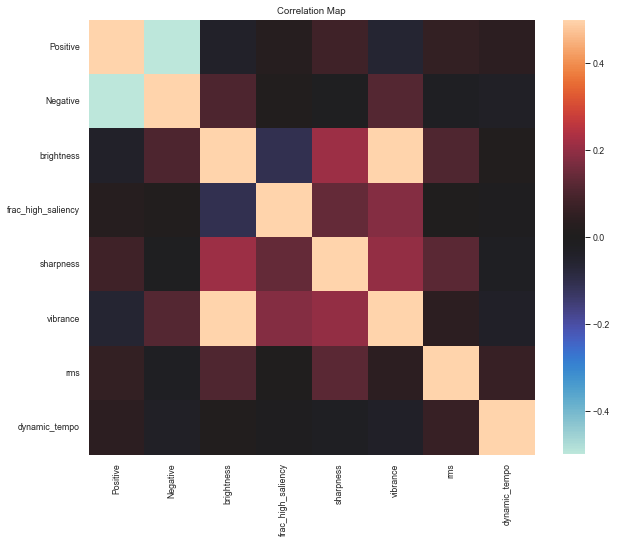

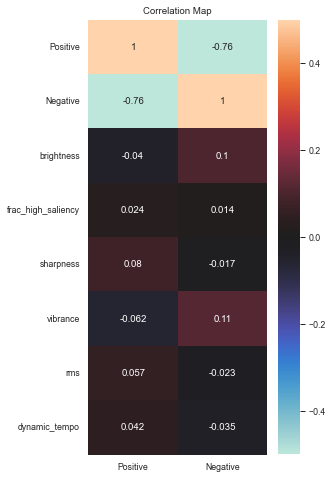

In [18]:
# Compute first derivative and compute correlations between shifts in values
corr = ec.pairwise_corr(data)

plt.figure(figsize=(10,8))
sns.heatmap(corr, center=0, vmin=-0.5, vmax=0.5)
plt.title("Correlation Map")
plt.show()
plt.close()

plt.figure(figsize=(4,8))
sns.heatmap(corr[['Positive','Negative']], annot=True, center=0, vmin=-0.5, vmax=0.5)
plt.title("Correlation Map")
plt.show()
plt.close()

In [19]:
vifs = ec.vif_collineary(data)
vifs

Positive              1.608385
Negative              1.597983
brightness            2.294674
frac_high_saliency    1.303687
sharpness             1.647637
vibrance              1.774866
rms                   1.057849
dynamic_tempo         1.008917
Name: VIF, dtype: float64